Perform the following operations using Python by creating student performance dataset.

    1 Display Missing Values
    2 Replace missing values using any 2 suitable methods
    3 Identify outliers using boxplot and scatterplot
    4 Handle outlier using any technique
    5 Perform any 2 data normalization technique

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('academicperformance.csv')
df.head()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,8.40,8.60,9.80,9.90
1,2,Ahire Anuja Sanjay,8.14,8.14,9.32,9.82
2,3,Ajare Ashiya Nasaruddin,6.61,6.61,9.14,9.14
3,4,Amrutkar Roshani Suresh,7.20,7.30,8.90,NaN
4,5,Attarde Komal Bhagwan,7.05,7.45,9.05,9.40


In [2]:
df.info()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     60 non-null     int64  
 1   Name     60 non-null     object 
 2   Femarks  58 non-null     float64
 3   SEMarks  57 non-null     float64
 4   Temarks  59 non-null     float64
 5   Bemarks  58 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ KB


Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

## Display Missing Values

In [3]:
df.isnull().sum()
fe=pd.isnull(df['Femarks'])
df[fe]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
5,6,Avhad Pushkaraj Laxmikant,NaN,8.0,7.91,7.84
39,40,Mahale Shreya Sanjay,NaN,0.0,9.86,9.91


In [4]:
se = pd.isnull(df['SEMarks'])
df[se]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
15,16,Chavhan Divya Bhikan,8.04,NaN,9.59,9.66
45,46,Patel Jaid Aslam,0.00,NaN,8.50,9.14
58,59,Ratnaparkhi Raj Ashok,8.59,NaN,9.63,9.56


In [5]:
te = pd.isnull(df['Temarks'])
df[te]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
18,19,Deore Atharva Mohan,6.25,6.89,NaN,7.2


In [6]:
be = pd.isnull(df['Bemarks'])
df[be]

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
3,4,Amrutkar Roshani Suresh,7.2,7.3,8.9,NaN
52,53,Patole Tanisha Prakash,4.0,8.0,9.0,NaN


## 2 Replace missing values using any 2 suitable methods


In [7]:
miss=[0]
data=pd.read_csv('academicperformance.csv',na_values=miss)
#pandas will consider 0 as a missing value (NaN) when reading the CSV file.
data.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.55,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.27,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.54,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.59,NaN,9.63,9.56
59,60,Ravte Rohit Ukhardya,NaN,NaN,5.00,9.36


##Replacing with single constant value

In [8]:
singleval = df.fillna(0)
singleval.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.55,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.27,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.54,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.59,0.00,9.63,9.56
59,60,Ravte Rohit Ukhardya,0.00,0.00,5.00,9.36


##Replacing with mean, median, std, max

In [9]:
# replace by mean
mean_data = data
mean_data['Femarks'] = mean_data['Femarks'].fillna(mean_data['Femarks'].mean())
mean_data.tail()

# replace by median
med_data = data
med_data['SEMarks'] = med_data['SEMarks'].fillna(med_data['SEMarks'].median())
med_data.tail()

# replace by standard deviation
std_data = data
std_data['SEMarks'] = std_data['SEMarks'].fillna(std_data['SEMarks'].std())
std_data.tail()

#replace by max
max_data = mean_data
max_data['SEMarks'] = max_data['SEMarks'].fillna(max_data['SEMarks'].max())
max_data.tail()

,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
55,56,Pawar Manish Sahebrao,8.550000,8.64,9.73,9.80
56,57,Phadol Purva Gorakh,7.270000,7.83,9.55,9.13
57,58,Rabade Vishal Chandrasing,9.540000,10.00,9.45,9.54
58,59,Ratnaparkhi Raj Ashok,8.590000,8.64,9.63,9.56
59,60,Ravte Rohit Ukhardya,9.679074,8.64,5.00,9.36


## Identify outliers using boxplot

In [10]:
data.columns

Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

<Axes: >

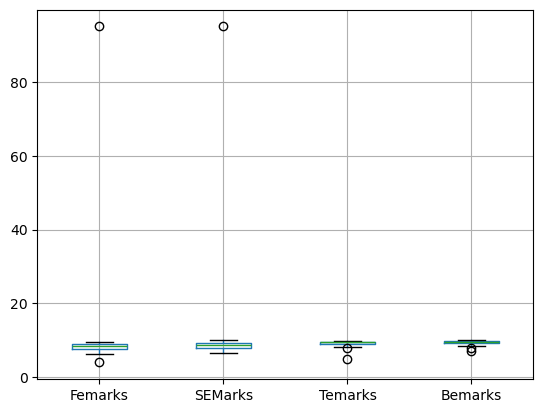

In [11]:
cols = ['Femarks', 'SEMarks', 'Temarks', 'Bemarks']
data.boxplot(cols)

Detecting outliers using IQR

In [12]:
fe_q1 = mean_data['Femarks'].quantile(0.25)
fe_q3 = mean_data['Femarks'].quantile(0.75)
fe_iqr = fe_q3 - fe_q1
fe_lowbound = fe_q1 - 1.5 * fe_iqr
fe_highbound = fe_q3 + 1.5 * fe_iqr
print(f"low bound {fe_lowbound}  high bound {fe_highbound}")
fe_data = mean_data['Femarks']
fe_outliers = []
for i in fe_data: 
    if i < fe_lowbound or i > fe_highbound:
        fe_outliers.append(i)

print(f"FE outliers {fe_outliers} ")

trimmed_fe = mean_data[(mean_data['Femarks'] >= fe_lowbound) & (mean_data['Femarks'] <= fe_highbound)]
print("Original dataset size:", mean_data.shape)
print("Trimmed dataset size:", trimmed_fe.shape)
data.columns

# another tefchnickl

# refined_df['Temarks']=np.where(refined_df['Temarks']<lwrbound,mediana,refined_df['Temarks'])

low bound 5.316250000000001  high bound 11.186249999999998
FE outliers [95.0, 4.0] 
Original dataset size: (60, 6)
Trimmed dataset size: (58, 6)


Index(['Roll', 'Name', 'Femarks', 'SEMarks', 'Temarks', 'Bemarks'], dtype='object')

In [45]:
data1 = pd.read_csv('academicperformance.csv')
# data1 = data1.dropna()
print(data1.isna().sum())

mean_fe = data1['Femarks'].mean()
std_fe = data1['Femarks'].std()
z_scores = (df['Femarks'] - mean_fe) / std_fe
outliers = df[(np.abs(z_scores) > 1) | (np.abs(z_scores) <= 0) ]
outliers
# data1.tail()
# Calculate Z-scores

# Absolute Z-scores greater than 3 are considered outliers

# 'outliers' now contains the rows of the DataFrame where the column values are outliers

Roll       0
Name       0
Femarks    2
SEMarks    3
Temarks    1
Bemarks    2
dtype: int64


,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
32,33,Khairnar Tejas Dadaji,95.0,95.0,9.4,9.9


## 5 Perform any 2 data normalization technique

In [44]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your data is stored in a DataFrame called df

# Separate the numerical columns for normalization
numerical_columns = ['Femarks', 'SEMarks', 'Temarks', 'Bemarks']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = data.copy()  # Make a copy of the original DataFrame
df_min_max_scaled[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])
# df_min_max_scaled.head()

# scales all the values between 0 to 1 to extract features from it

#Z score normalization (standard scaling)
standard_scaler = StandardScaler()
df_standard_scaled = data.copy()  # Make a copy of the original DataFrame
df_standard_scaled[numerical_columns] = standard_scaler.fit_transform(data[numerical_columns])

# Print the first few rows of the normalized DataFrames
print("Min-Max Scaled DataFrame:")
print(df_min_max_scaled.head())

print("\nStandardized DataFrame:")
print(df_standard_scaled.head())


# Decimal Scaling
def decimal_scaling(column):
    max_abs_value = np.max(np.abs(column))
    num_digits = len(str(int(max_abs_value)))  # Number of digits before the decimal point
    scale = 10 ** num_digits
    return column / scale

dec_data = data.copy()

dec_data[numerical_columns] = dec_data[numerical_columns].apply(decimal_scaling)
dec_data

Min-Max Scaled DataFrame:
   Roll                     Name   Femarks   SEMarks   Temarks   Bemarks
0     1      Aage Raksha Gajanan  0.048352  0.022735  0.977597  0.964286
1     2       Ahire Anuja Sanjay  0.045495  0.017532  0.879837  0.935714
2     3  Ajare Ashiya Nasaruddin  0.028681  0.000226  0.843177  0.692857
3     4  Amrutkar Roshani Suresh  0.035165  0.008031  0.794297       NaN
4     5    Attarde Komal Bhagwan  0.033516  0.009727  0.824847  0.785714

Standardized DataFrame:
   Roll                     Name   Femarks   SEMarks   Temarks   Bemarks
0     1      Aage Raksha Gajanan -0.114628 -0.115849  0.727803  0.984616
1     2       Ahire Anuja Sanjay -0.137928 -0.157251  0.045984  0.823975
2     3  Ajare Ashiya Nasaruddin -0.275044 -0.294956 -0.209698 -0.541469
3     4  Amrutkar Roshani Suresh -0.222169 -0.232854 -0.550607       NaN
4     5    Attarde Komal Bhagwan -0.235612 -0.219353 -0.337539 -0.019388


,Roll,Name,Femarks,SEMarks,Temarks,Bemarks
0,1,Aage Raksha Gajanan,0.084000,0.0860,0.980,0.0990
1,2,Ahire Anuja Sanjay,0.081400,0.0814,0.932,0.0982
2,3,Ajare Ashiya Nasaruddin,0.066100,0.0661,0.914,0.0914
3,4,Amrutkar Roshani Suresh,0.072000,0.0730,0.890,NaN
4,5,Attarde Komal Bhagwan,0.070500,0.0745,0.905,0.0940
5,6,Avhad Pushkaraj Laxmikant,0.096791,0.0800,0.791,0.0784
6,7,Aware Priti Balkrushna,0.082700,0.0850,0.968,0.0914
7,8,Barse Rutuja Kiran,0.086800,0.0900,0.959,0.0966
8,9,Baviskar Pratham Pravin,0.076400,0.0764,0.918,0.0939
9,10,Bhalerao Tejal Pradip,0.090900,0.0936,0.991,0.0995
